На этом занятии мы попробуем задачу регрессии. Данные возьмем вот эти - https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Перед обучением модели, нужно подготовить данные:

- найти\собрать данные
- почистить и предобработать
- преобразовать в матрицы 


In [1]:
# традиционная ячейка импортов
from unittest.mock import inplace

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline

# import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
data = pd.read_csv('IMDB-Movie-Data.csv')
print(data.shape)
data.head(3)

(1000, 12)


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0


In [6]:
data_imdb = pd.read_csv("imdb_top_1000.csv")
print(data_imdb.shape)
data_imdb.head(5)

(1000, 16)


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [25]:
data_wine = pd.read_csv("winemag-data-130k-v2.csv")
print(data_wine.shape)
data_wine.head(5)

(129971, 14)


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [29]:
data_hotels = pd.read_csv("Hotel_Reviews.csv")
print(data_hotels.shape)
data_hotels.head(5)

(515738, 17)


,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [4]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [7]:
data_imdb.columns

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [23]:
print(data_imdb.Released_Year.min(), data_imdb.Released_Year.max())
new_data = data_imdb.drop(data_imdb[data_imdb.Released_Year == "PG"].index)
print(new_data.Released_Year.min(), new_data.Released_Year.max())

1920 PG
1920 2020


In [26]:
data_wine.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [30]:
data_hotels.columns

Index(['Hotel_Address', 'Additional_Number_of_Scoring', 'Review_Date',
       'Average_Score', 'Hotel_Name', 'Reviewer_Nationality',
       'Negative_Review', 'Review_Total_Negative_Word_Counts',
       'Total_Number_of_Reviews', 'Positive_Review',
       'Review_Total_Positive_Word_Counts',
       'Total_Number_of_Reviews_Reviewer_Has_Given', 'Reviewer_Score', 'Tags',
       'days_since_review', 'lat', 'lng'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [27]:
data_imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [28]:
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [31]:
data_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

можно добавить свою колонку как комбинацию других колонок, например

In [32]:
data_hotels["review_general"] = data_hotels.Negative_Review + "\n" + data_hotels.Positive_Review

In [33]:
data_hotels.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,review_general
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,No Negative\n No real complaints the hotel was...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Rooms are nice but for elderly a bit difficul...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,My room was dirty and I was afraid to walk ba...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,You When I booked with your company on line y...


## Убрать NaN

1. можно убрать все строчки, где нет значений

In [38]:
print(data.isna().any())
data1 = data.dropna()
print(data1.isna().any())

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)     True
Metascore              True
dtype: bool
Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)    False
Metascore             False
dtype: bool


2. можно заменить NaN на нули

In [39]:
data.fillna(0).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  1000 non-null   float64
 11  Metascore           1000 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


3. можно заменить на средние значения по колонке

In [43]:
data.fillna(data.mean(numeric_only=True)).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  1000 non-null   float64
 11  Metascore           1000 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


Чтобы посмотреть, как колонки связаны между собой, можно посчитать корреляцию.

In [44]:
# метод corr считает корреляцию всех колонок со всеми (острожнее, если у вас большой датасет)

data_hotels.corr()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
Additional_Number_of_Scoring,1.000000,-0.152846,0.029195,0.824884,-0.053087,-0.071969,-0.061554,0.336295,-0.295732
Average_Score,-0.152846,1.000000,-0.112323,-0.179568,0.106719,0.036454,0.364351,-0.108642,0.106078
Review_Total_Negative_Word_Counts,0.029195,-0.112323,1.000000,0.035124,0.119613,0.003199,-0.382474,0.019112,-0.020002
Total_Number_of_Reviews,0.824884,-0.179568,0.035124,1.000000,-0.030132,-0.024910,-0.072865,0.100295,-0.014141
Review_Total_Positive_Word_Counts,-0.053087,0.106719,0.119613,-0.030132,1.000000,0.026535,0.220800,-0.037567,0.035471
Total_Number_of_Reviews_Reviewer_Has_Given,-0.071969,0.036454,0.003199,-0.024910,0.026535,1.000000,0.002873,-0.059793,0.110810
Reviewer_Score,-0.061554,0.364351,-0.382474,-0.072865,0.220800,0.002873,1.000000,-0.036562,0.034001
lat,0.336295,-0.108642,0.019112,0.100295,-0.037567,-0.059793,-0.036562,1.000000,-0.304524
lng,-0.295732,0.106078,-0.020002,-0.014141,0.035471,0.110810,0.034001,-0.304524,1.000000


Для наглядности можно нарисовать тепловую карту для таблицы корреляций.

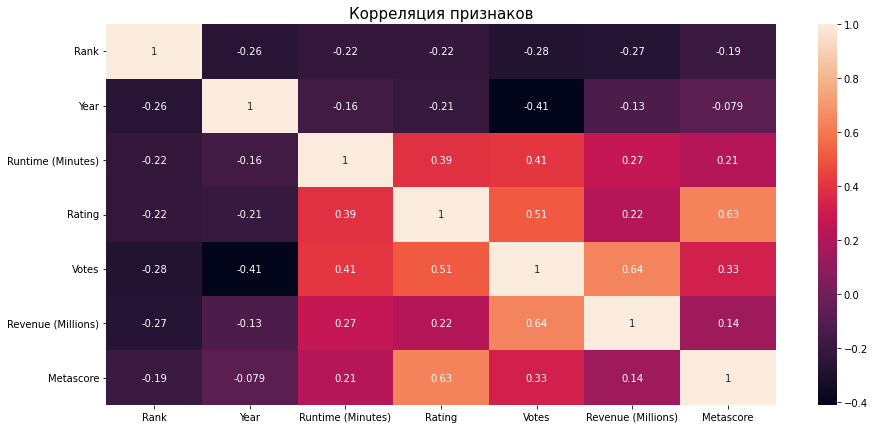

In [48]:
fig, ax = plt.subplots(figsize=(15,7))

sns.heatmap(data=data.corr(), annot=True, cmap= "rocket")
# дополнительные цветовые схемы https://seaborn.pydata.org/tutorial/color_palettes.html

plt.title("Корреляция признаков", fontsize=15)
plt.show()

## Подготовка данных

Попробуем предсказывать год фильма по данным его описания, рейтинга, длины в минутах и кассовых сборов

In [52]:
# подготовим описания фильмов - наивная токенизация описаний
data["text"] = data.Description.apply(lambda x: x.lower().split()) 

data["text"]

0      [a, group, of, intergalactic, criminals, are, ...
1      [following, clues, to, the, origin, of, mankin...
2      [three, girls, are, kidnapped, by, a, man, wit...
3      [in, a, city, of, humanoid, animals,, a, hustl...
4      [a, secret, government, agency, recruits, some...
                             ...                        
995    [a, tight-knit, team, of, rising, investigator...
996    [three, american, college, students, studying,...
997    [romantic, sparks, occur, between, two, dance,...
998    [a, pair, of, friends, embark, on, a, mission,...
999    [a, stuffy, businessman, finds, himself, trapp...
Name: text, Length: 1000, dtype: object

In [51]:
input_text = list(data.text.values)
print(input_text)

[['a', 'group', 'of', 'intergalactic', 'criminals', 'are', 'forced', 'to', 'work', 'together', 'to', 'stop', 'a', 'fanatical', 'warrior', 'from', 'taking', 'control', 'of', 'the', 'universe.'], ['following', 'clues', 'to', 'the', 'origin', 'of', 'mankind,', 'a', 'team', 'finds', 'a', 'structure', 'on', 'a', 'distant', 'moon,', 'but', 'they', 'soon', 'realize', 'they', 'are', 'not', 'alone.'], ['three', 'girls', 'are', 'kidnapped', 'by', 'a', 'man', 'with', 'a', 'diagnosed', '23', 'distinct', 'personalities.', 'they', 'must', 'try', 'to', 'escape', 'before', 'the', 'apparent', 'emergence', 'of', 'a', 'frightful', 'new', '24th.'], ['in', 'a', 'city', 'of', 'humanoid', 'animals,', 'a', 'hustling', 'theater', "impresario's", 'attempt', 'to', 'save', 'his', 'theater', 'with', 'a', 'singing', 'competition', 'becomes', 'grander', 'than', 'he', 'anticipates', 'even', 'as', 'its', "finalists'", 'find', 'that', 'their', 'lives', 'will', 'never', 'be', 'the', 'same.'], ['a', 'secret', 'government

In [53]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(input_text)]
documents[10:15]

[TaggedDocument(words=['the', 'adventures', 'of', 'writer', 'newt', 'scamander', 'in', 'new', "york's", 'secret', 'community', 'of', 'witches', 'and', 'wizards', 'seventy', 'years', 'before', 'harry', 'potter', 'reads', 'his', 'book', 'in', 'school.'], tags=[10]),
 TaggedDocument(words=['the', 'story', 'of', 'a', 'team', 'of', 'female', 'african-american', 'mathematicians', 'who', 'served', 'a', 'vital', 'role', 'in', 'nasa', 'during', 'the', 'early', 'years', 'of', 'the', 'u.s.', 'space', 'program.'], tags=[11]),
 TaggedDocument(words=['the', 'rebel', 'alliance', 'makes', 'a', 'risky', 'move', 'to', 'steal', 'the', 'plans', 'for', 'the', 'death', 'star,', 'setting', 'up', 'the', 'epic', 'saga', 'to', 'follow.'], tags=[12]),
 TaggedDocument(words=['in', 'ancient', 'polynesia,', 'when', 'a', 'terrible', 'curse', 'incurred', 'by', 'the', 'demigod', 'maui', 'reaches', 'an', 'impetuous', "chieftain's", "daughter's", 'island,', 'she', 'answers', 'the', "ocean's", 'call', 'to', 'seek', 'out'

обучаем модель на текстах описаний фильмов (можно поизменять параметры)

In [54]:
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

In [55]:
model.save("D2V.model") # сохранение модели

In [57]:
print(model.dv[0]) # как смотреть векторы документов

[-0.01763616  0.0320156  -0.03183376 -0.1063817   0.08263332]


In [119]:
print(model.dv[documents[0].tags[0]])

[-0.01763616  0.0320156  -0.03183376 -0.1063817   0.08263332]


In [74]:
# добавим векторы текстов в датасет
vectors = []
for x in documents:
    vec = model.dv[x.tags[0]]
    vectors.append(vec)

print(vectors)

[array([-0.01763616,  0.0320156 , -0.03183376, -0.1063817 ,  0.08263332],
      dtype=float32), array([ 0.12376253, -0.00616232,  0.1152311 , -0.5454779 ,  0.06439073],
      dtype=float32), array([ 0.19612812,  0.31961048,  0.15472077, -0.45810154, -0.04105519],
      dtype=float32), array([-0.02260007,  0.3084744 ,  0.4611966 , -0.6573833 , -0.03873175],
      dtype=float32), array([ 0.08731035,  0.33607993,  0.18306066, -0.44574514,  0.13670401],
      dtype=float32), array([ 0.02639192,  0.15586843,  0.1496246 , -0.4846259 , -0.15844682],
      dtype=float32), array([ 0.18574135,  0.24730004, -0.01587395, -0.2831333 , -0.02083369],
      dtype=float32), array([ 0.17814416,  0.23699245,  0.10739629, -0.54968596,  0.06209574],
      dtype=float32), array([ 0.07554733,  0.03633377,  0.28571767, -0.50787103,  0.07164847],
      dtype=float32), array([ 0.11913866,  0.35816112,  0.3274202 , -0.518202  , -0.12637387],
      dtype=float32), array([ 0.15777339,  0.32156238,  0.20438348, -0.

In [75]:
data = data.assign(Vector = vectors)

In [103]:
vdf = pd.DataFrame(vectors)

In [114]:
vdf

,0,1,2,3,4
0,-0.017636,0.032016,-0.031834,-0.106382,0.082633
1,0.123763,-0.006162,0.115231,-0.545478,0.064391
2,0.196128,0.319610,0.154721,-0.458102,-0.041055
3,-0.022600,0.308474,0.461197,-0.657383,-0.038732
4,0.087310,0.336080,0.183061,-0.445745,0.136704
...,...,...,...,...,...
995,0.272811,0.359189,0.184167,-0.390211,-0.101285
996,0.043157,0.405083,0.351431,-0.639352,0.146878
997,-0.057729,0.364042,0.156498,-0.180371,-0.135294
998,0.001762,0.206043,0.237805,-0.234616,-0.027633


In [76]:
data.Vector

0      [-0.017636161, 0.032015596, -0.031833757, -0.1...
1      [0.123762526, -0.006162317, 0.115231104, -0.54...
2      [0.19612812, 0.31961048, 0.15472077, -0.458101...
3      [-0.022600073, 0.3084744, 0.4611966, -0.657383...
4      [0.08731035, 0.33607993, 0.18306066, -0.445745...
                             ...                        
995    [0.27281088, 0.35918918, 0.1841671, -0.3902114...
996    [0.043157242, 0.40508345, 0.35143077, -0.63935...
997    [-0.057728875, 0.36404222, 0.15649845, -0.1803...
998    [0.0017617426, 0.2060433, 0.23780529, -0.23461...
999    [-0.05153281, 0.1283544, 0.23478633, -0.414333...
Name: Vector, Length: 1000, dtype: object

In [129]:
# можно переопределить датасет, оставив только важное

data_sm = data[['Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)', 'Metascore']]
data_sm

,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,121,8.1,757074,333.13,76.0
1,124,7.0,485820,126.46,65.0
2,117,7.3,157606,138.12,62.0
3,108,7.2,60545,270.32,59.0
4,123,6.2,393727,325.02,40.0
...,...,...,...,...,...
995,111,6.2,27585,NaN,45.0
996,94,5.5,73152,17.54,46.0
997,98,6.2,70699,58.01,50.0
998,93,5.6,4881,NaN,22.0


In [131]:
# data_sm1 = data_sm.append(vdf, ignore_index=True)

vdf2 = pd.DataFrame(data.Vector.tolist(), columns=["v1", "v2", "v3", "v4", "v5"])

In [132]:
vdf2

,v1,v2,v3,v4,v5
0,-0.017636,0.032016,-0.031834,-0.106382,0.082633
1,0.123763,-0.006162,0.115231,-0.545478,0.064391
2,0.196128,0.319610,0.154721,-0.458102,-0.041055
3,-0.022600,0.308474,0.461197,-0.657383,-0.038732
4,0.087310,0.336080,0.183061,-0.445745,0.136704
...,...,...,...,...,...
995,0.272811,0.359189,0.184167,-0.390211,-0.101285
996,0.043157,0.405083,0.351431,-0.639352,0.146878
997,-0.057729,0.364042,0.156498,-0.180371,-0.135294
998,0.001762,0.206043,0.237805,-0.234616,-0.027633


In [133]:
res_data = pd.concat([data_sm, vdf2], axis=1)

In [134]:
res_data

,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,v1,v2,v3,v4,v5
0,121,8.1,757074,333.13,76.0,-0.017636,0.032016,-0.031834,-0.106382,0.082633
1,124,7.0,485820,126.46,65.0,0.123763,-0.006162,0.115231,-0.545478,0.064391
2,117,7.3,157606,138.12,62.0,0.196128,0.319610,0.154721,-0.458102,-0.041055
3,108,7.2,60545,270.32,59.0,-0.022600,0.308474,0.461197,-0.657383,-0.038732
4,123,6.2,393727,325.02,40.0,0.087310,0.336080,0.183061,-0.445745,0.136704
...,...,...,...,...,...,...,...,...,...,...
995,111,6.2,27585,NaN,45.0,0.272811,0.359189,0.184167,-0.390211,-0.101285
996,94,5.5,73152,17.54,46.0,0.043157,0.405083,0.351431,-0.639352,0.146878
997,98,6.2,70699,58.01,50.0,-0.057729,0.364042,0.156498,-0.180371,-0.135294
998,93,5.6,4881,NaN,22.0,0.001762,0.206043,0.237805,-0.234616,-0.027633


## Подготавливаем матрицы

In [135]:
res_data.dropna(inplace=True)

In [139]:
res_data.head(5)

,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,v1,v2,v3,v4,v5
0,121,8.1,757074,333.13,76.0,-0.017636,0.032016,-0.031834,-0.106382,0.082633
1,124,7.0,485820,126.46,65.0,0.123763,-0.006162,0.115231,-0.545478,0.064391
2,117,7.3,157606,138.12,62.0,0.196128,0.319610,0.154721,-0.458102,-0.041055
3,108,7.2,60545,270.32,59.0,-0.022600,0.308474,0.461197,-0.657383,-0.038732
4,123,6.2,393727,325.02,40.0,0.087310,0.336080,0.183061,-0.445745,0.136704


In [138]:
# определяем X и y

X = res_data.values

display(X, X.shape)

array([[ 1.21000000e+02,  8.10000000e+00,  7.57074000e+05, ...,
        -3.18337567e-02, -1.06381699e-01,  8.26333165e-02],
       [ 1.24000000e+02,  7.00000000e+00,  4.85820000e+05, ...,
         1.15231104e-01, -5.45477927e-01,  6.43907338e-02],
       [ 1.17000000e+02,  7.30000000e+00,  1.57606000e+05, ...,
         1.54720768e-01, -4.58101541e-01, -4.10551913e-02],
       ...,
       [ 9.40000000e+01,  5.50000000e+00,  7.31520000e+04, ...,
         3.51430774e-01, -6.39352202e-01,  1.46878153e-01],
       [ 9.80000000e+01,  6.20000000e+00,  7.06990000e+04, ...,
         1.56498447e-01, -1.80371121e-01, -1.35293916e-01],
       [ 8.70000000e+01,  5.30000000e+00,  1.24350000e+04, ...,
         2.34786332e-01, -4.14333433e-01,  1.12778828e-01]])

(838, 10)

In [140]:
new_data = data.dropna()

print(new_data.isna().any())

y = new_data['Year'].values # отдельно вынесли массив со значениями года
display(y, y.shape)

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)    False
Metascore             False
text                  False
Vector                False
dtype: bool


array([2014, 2012, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016,
       2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2014, 2016,
       2016, 2016, 2016, 2016, 2016, 2011, 2016, 2016, 2015, 2016, 2016,
       2014, 2008, 2016, 2016, 2016, 2016, 2016, 2016, 2016, 2015, 2006,
       2014, 2016, 2015, 2016, 2016, 2016, 2016, 2016, 2016, 2007, 2012,
       2009, 2006, 2016, 2010, 2016, 2013, 2014, 2015, 2015, 2016, 2009,
       2015, 2016, 2013, 2016, 2011, 2016, 2015, 2016, 2016, 2016, 2016,
       2006, 2015, 2011, 2015, 2015, 2016, 2016, 2016, 2014, 2016, 2013,
       2006, 2011, 2016, 2016, 2016, 2016, 2016, 2014, 2016, 2012, 2016,
       2014, 2016, 2008, 2015, 2016, 2014, 2016, 2014, 2013, 2012, 2007,
       2013, 2010, 2009, 2010, 2015, 2015, 2012, 2016, 2016, 2009, 2007,
       2016, 2016, 2012, 2016, 2015, 2007, 2013, 2011, 2010, 2007, 2016,
       2014, 2016, 2006, 2008, 2016, 2015, 2016, 20

(838,)

импортируем функцию, которая разобъет данные (матрицу "объект-признак" и массив со значениями целевой переменной) на 4 части:

- X_train - кусочек матрицы "объекты-признаки" (для обучения алгоритма)
- y_train - массив со значениями целевой переменной (для обучения)


- X_test - кусочек матрицы "объекты-признаки" (для тестирования и валидации алгоритма)
- y_test - массив со значениями целевой переменной (для тестирования и валидации алгоритма)

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # создали переменные, разделили данные

In [142]:
# силу регуляризации можно варьировать параметром alpha
regressor = Ridge(alpha=0.01) 

regressor.fit(X_train, y_train)

Ridge(alpha=0.01)

### оценка результатов алгоритма

В качестве метрики будем использовать [среднюю абсолютную ошибку](https://www.youtube.com/watch?v=ZejnwbcU8nw). Она показывает отклонение от правильного ответа в тех же единах измерения

*(а вообще есть [разные способы](https://towardsdatascience.com/what-are-the-best-metrics-to-evaluate-your-regression-model-418ca481755b))*

In [144]:
preds = regressor.predict(X_test)

In [145]:
mean_absolute_error(y_test, preds)

2.4693110767222186

In [146]:
mean_squared_error(y_test, preds) # check

8.764739725523949

121,8.1,757074,333.13,76.0,-0.017636,0.032016,-0.031834,-0.106382,0.082633

In [150]:
regressor.predict([[121,8.1,757074,333.13,76.0,-0.017636,0.032016,-0.031834,-0.106382,0.082633],
                   [124,7.0,485820,126.46,65.0,0.123763,-0.006162,0.115231,-0.545478,0.064391],
                   [117,7.3,157606,138.12,62.0,0.196128,0.319610,0.154721,-0.458102,-0.041055]])

array([2009.55523742, 2010.03288773, 2013.26207238])

In [159]:
print(preds[:5].round(), y_test[:5])

[2010. 2013. 2013. 2012. 2012.] [2014 2014 2016 2006 2011]


### дополнительное

Иногда бывает полезно [нормализовать](https://en.wikipedia.org/wiki/Normalization_(statistics)) данные (вычесть среднее и разделить на стандартное отклонение). После нормализации среднее всех колонок будет равно 0, а стандартное отклонение 1. Это позволяет исправить ситуацию, когда признаки представлены в разных единацах измерения. 
Для этого используется StandardScaler. 

In [ ]:
# sc = StandardScaler()
# X_train, X_test, y_train, y_test = train_test_split(sc.fit_transform(X), y, random_state=42)

До стандартизации:

In [ ]:
list(X[0])

После:

In [ ]:
list(sc.fit_transform(X)[0])

теперь с данными удобнее работать и обучать